# First test

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from environment import RULEnvironment
from stable_baselines3 import DQN 
from stable_baselines3.common.monitor import Monitor, load_results
import pandas as pd
import os

import utils


In [2]:
SWEET_SPOT = 0.30
BAD_SPOT = 0.30
ENVIRONMENT_TYPE = 1

In [3]:
# Create log dir
log_dir = "./pretrained_models/env1/"
os.makedirs(log_dir, exist_ok=True)

### Import the data

In [5]:
data_path = "./data"
data = utils.load_data(data_path)
data.head()

,src,machine,cycle,p1,p2,p3,s1,s2,s3,s4,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,rul
0,train_FD001,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,train_FD001,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,train_FD001,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,train_FD001,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,train_FD001,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [6]:
# Last column is the RUL (Label)
dt_in = list(data.columns[3:-1])
data[dt_in].describe()

,p1,p2,p3,s1,s2,s3,s4,s5,s6,s7,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,...,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000
mean,17.211973,0.410004,95.724344,485.840890,597.361022,1467.035653,1260.956434,9.894999,14.424935,359.729968,...,338.789821,2349.645243,8088.950972,9.054747,0.025185,360.698801,2273.754039,98.389146,25.942709,15.565700
std,16.527988,0.367938,12.359044,30.420388,42.478516,118.175261,136.300073,4.265554,6.443922,174.133835,...,164.193480,111.167242,80.623257,0.751581,0.004997,31.021430,142.513114,4.656270,11.691422,7.015067
min,-0.008700,-0.000600,60.000000,445.000000,535.480000,1242.670000,1023.770000,3.910000,5.670000,136.170000,...,128.310000,2027.570000,7845.780000,8.156300,0.020000,302.000000,1915.000000,84.930000,10.160000,6.010500
25%,0.001300,0.000200,100.000000,449.440000,549.960000,1357.360000,1126.830000,5.480000,8.000000,175.710000,...,164.790000,2387.970000,8070.530000,8.439250,0.020000,332.000000,2212.000000,100.000000,14.330000,8.601300
50%,19.998100,0.620000,100.000000,489.050000,605.930000,1492.810000,1271.740000,9.350000,13.660000,341.690000,...,321.690000,2388.070000,8118.590000,9.030100,0.030000,367.000000,2319.000000,100.000000,24.920000,14.953500
75%,35.001500,0.840000,100.000000,518.670000,642.340000,1586.590000,1402.200000,14.620000,21.610000,553.290000,...,521.340000,2388.160000,8139.410000,9.344200,0.030000,392.000000,2388.000000,100.000000,38.820000,23.294600
max,42.008000,0.842000,100.000000,518.670000,645.110000,1616.910000,1441.490000,14.620000,21.610000,570.810000,...,537.490000,2390.490000,8293.720000,11.066900,0.030000,400.000000,2388.000000,100.000000,39.890000,23.950500


In [7]:
# Check for null-values
data[dt_in].isnull().any().any()

# No null values

False

In [8]:
# Standardize all the daa-columns
data_sv = data.copy()
data_sv[dt_in] = (data_sv[dt_in] - data_sv[dt_in].mean()) / data_sv[dt_in].std()
data_sv.head()

,src,machine,cycle,p1,p2,p3,s1,s2,s3,s4,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,rul
0,train_FD001,1,1,-1.041426,-1.115415,0.345954,1.079181,1.046623,1.037987,1.024530,...,0.345198,0.616063,-0.845214,0.963586,1.009019,0.801652,0.345954,1.121959,1.119490,191
1,train_FD001,1,2,-1.041268,-1.115143,0.345954,1.079181,1.054391,1.055926,1.043166,...,0.345648,0.527627,-0.828849,0.963586,1.009019,0.801652,0.345954,1.116827,1.120146,190
2,train_FD001,1,3,-1.041644,-1.113512,0.345954,1.079181,1.059100,1.023517,1.050943,...,0.345288,0.549209,-0.847476,0.963586,0.944547,0.801652,0.345954,1.112550,1.108828,189
3,train_FD001,1,4,-1.041341,-1.114327,0.345954,1.079181,1.059100,0.979514,1.033848,...,0.345738,0.556651,-0.913470,0.963586,1.009019,0.801652,0.345954,1.106563,1.113061,188
4,train_FD001,1,5,-1.041498,-1.114871,0.345954,1.079181,1.059570,0.980022,1.065763,...,0.345378,0.556279,-0.832042,0.963586,1.041254,0.801652,0.345954,1.108273,1.117409,187


In [9]:
data_sv_dict = utils.split_by_field(data_sv, field='src')
print('{{{}}}'.format(', '.join(f'{k}: ...' for k in data_sv_dict.keys())))

{train_FD001: ..., train_FD002: ..., train_FD003: ..., train_FD004: ...}


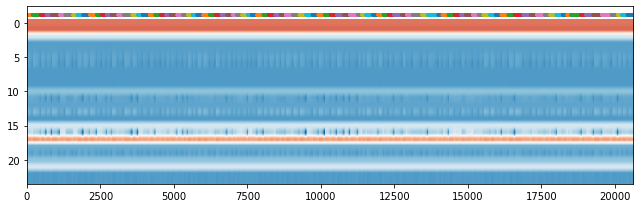

In [10]:
tmp = data_sv_dict['train_FD001']
utils.plot_dataframe(tmp[dt_in], labels=tmp['machine'])

## Train model

### Preprocess train data

### Set up environment

In [11]:
env = RULEnvironment(data_sv, dt_in)

/Users/olestole/code/unibo/AI-industry/Turbine-RUL-RL/venv/lib/python3.9/site-packages/gym/logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


In [12]:
states = env.observation_space.shape
actions = env.action_space.n
states

(24,)

#### Make monitor for the environment

In [13]:
env_monitor = Monitor(env, log_dir)

### Make model

In [14]:
# Learning starts is the same as warmup in keras-rl2

# If you want to plot with tensorboard un comment next line: 
# model = DQN("MlpPolicy", env_monitor, verbose = 1, learning_starts=10000, tensorboard_log="./tensorboard/")

# If not use this:
model = DQN("MlpPolicy", env, verbose = 1, learning_starts=10000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


### Train model

In [15]:
model.learn(total_timesteps=100000, log_interval=5000)

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.94     |
|    ep_rew_mean      | 1.94     |
|    exploration_rate | 0.952    |
| time/               |          |
|    episodes         | 5000     |
|    fps              | 720      |
|    time_elapsed     | 14       |
|    total_timesteps  | 10101    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.449    |
|    n_updates        | 25       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.1      |
|    ep_rew_mean      | 2.1      |
|    exploration_rate | 0.901    |
| time/               |          |
|    episodes         | 10000    |
|    fps              | 607      |
|    time_elapsed     | 34       |
|    total_timesteps  | 20826    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00137  |
|    n_updates      

### Save model

In [16]:
path = f'{log_dir}model'
utils.save_model(model, path)

## Test model

### Set up test environment

In [14]:
data_path = "./data"
data_test = utils.load_data(data_path, test=True)
dt_in_test = list(data_test.columns[3:-1])
data_test.describe()

,machine,cycle,p1,p2,p3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,rul
count,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,...,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000
mean,372.662478,95.406589,17.243810,0.410887,95.748591,485.791314,597.153354,1464.738375,1257.240382,9.887805,...,2349.811235,8084.687648,9.046593,0.025039,360.088096,2273.841797,98.398282,25.949868,15.570426,94.406589
std,201.744654,74.311486,16.530141,0.368078,12.328151,30.426804,42.430629,117.856835,135.728855,4.265536,...,110.890533,78.956087,0.748390,0.005000,30.932463,142.218102,4.644631,11.701010,7.020590,74.311486
min,1.000000,1.000000,-0.008700,-0.000600,60.000000,445.000000,535.410000,1240.940000,1024.900000,3.910000,...,2027.740000,7849.800000,8.198000,0.020000,302.000000,1915.000000,84.930000,10.180000,6.123100,0.000000
25%,197.000000,38.000000,0.001300,0.000200,100.000000,449.440000,549.780000,1355.140000,1124.030000,5.480000,...,2387.950000,8068.360000,8.425600,0.020000,331.000000,2212.000000,100.000000,14.340000,8.607300,37.000000
50%,390.000000,80.000000,19.998200,0.620000,100.000000,489.050000,605.530000,1490.160000,1262.850000,9.350000,...,2388.050000,8113.100000,9.108500,0.030000,367.000000,2319.000000,100.000000,24.780000,14.872400,79.000000
75%,544.000000,135.000000,35.001500,0.840000,100.000000,518.670000,642.200000,1584.810000,1399.460000,14.620000,...,2388.110000,8136.630000,9.333900,0.030000,392.000000,2388.000000,100.000000,38.880000,23.331000,134.000000
max,707.000000,486.000000,42.008000,0.842000,100.000000,518.670000,644.320000,1609.690000,1434.120000,14.620000,...,2389.960000,8243.100000,11.030000,0.030000,398.000000,2388.000000,100.000000,39.750000,23.849600,485.000000


In [16]:
# Check for null-values - no null-values
data_test[dt_in_test].isnull().any().any()

False

In [17]:
# Standardize all the data-columns
data_sv_test = data_test.copy()
data_sv_test[dt_in_test] = (data_sv_test[dt_in_test] - data_sv_test[dt_in_test].mean()) / data_sv_test[dt_in_test].std()
data_sv_test.describe()

,machine,cycle,p1,p2,p3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,rul
count,104897.000000,104897.000000,1.048970e+05,1.048970e+05,1.048970e+05,1.048970e+05,1.048970e+05,1.048970e+05,1.048970e+05,1.048970e+05,...,1.048970e+05,1.048970e+05,1.048970e+05,1.048970e+05,1.048970e+05,1.048970e+05,1.048970e+05,1.048970e+05,1.048970e+05,104897.000000
mean,372.662478,95.406589,8.670360e-18,1.300554e-16,2.460215e-16,-1.929155e-15,-5.505678e-16,-1.140152e-15,-1.586676e-15,-2.731163e-16,...,2.991274e-15,-7.495526e-15,9.190581e-16,-1.764418e-15,-7.066343e-16,1.486967e-15,4.324342e-16,-3.121329e-16,6.762880e-16,94.406589
std,201.744654,74.311486,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,74.311486
min,1.000000,1.000000,-1.043700e+00,-1.117934e+00,-2.899753e+00,-1.340638e+00,-1.455160e+00,-1.898900e+00,-1.711798e+00,-1.401419e+00,...,-2.904407e+00,-2.974915e+00,-1.133891e+00,-1.007737e+00,-1.877901e+00,-2.523179e+00,-2.899753e+00,-1.347736e+00,-1.345660e+00,0.000000
25%,197.000000,38.000000,-1.043095e+00,-1.115760e+00,3.448537e-01,-1.194714e+00,-1.116490e+00,-9.299280e-01,-9.814448e-01,-1.033353e+00,...,3.439317e-01,-2.067940e-01,-8.297717e-01,-1.007737e+00,-9.403744e-01,-4.348377e-01,3.448537e-01,-9.922108e-01,-9.918149e-01,37.000000
50%,390.000000,80.000000,1.666284e-01,5.681230e-01,3.448537e-01,1.070992e-01,1.974198e-01,2.156992e-01,4.132959e-02,-1.260814e-01,...,3.448334e-01,3.598500e-01,8.272022e-02,9.923125e-01,2.234515e-01,3.175278e-01,3.448537e-01,-9.998010e-02,-9.942553e-02,79.000000
75%,544.000000,135.000000,1.074261e+00,1.165823e+00,3.448537e-01,1.080583e+00,1.061654e+00,1.018792e+00,1.047822e+00,1.109402e+00,...,3.453745e-01,6.578638e-01,3.839000e-01,9.923125e-01,1.031664e+00,8.026981e-01,3.448537e-01,1.105044e+00,1.105402e+00,134.000000
max,707.000000,486.000000,1.498123e+00,1.171256e+00,3.448537e-01,1.080583e+00,1.111618e+00,1.229896e+00,1.303184e+00,1.109402e+00,...,3.620576e-01,2.006335e+00,2.650231e+00,9.923125e-01,1.225635e+00,8.026981e-01,3.448537e-01,1.179397e+00,1.179270e+00,485.000000


In [18]:
env_test = RULEnvironment(data_sv_test, dt_in_test)

/Users/olestole/code/unibo/AI-industry/Turbine-RUL-RL/venv/lib/python3.9/site-packages/gym/logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


In [20]:
nb_episodes = data_sv_test['machine'].max()

### Load trained model

In [44]:
if 'model' in locals():
    print('Deleting model')
    del model

Deleting model


In [45]:
# If the model is supposed to be trained on, env need to be set. 
# If it's only going to be used for prediction, it can be None
model = utils.load_model(f'{log_dir}/model.zip', env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


### Evaluate model on testset

In [24]:
# Evaluate for all 707 episodes
mean_episode_reward, all_episode_rewards, all_nr_of_actions = utils.evaluate(model, env_test, nb_episodes)

Mean reward: 0.3917963224893918 Num episodes: 707


## Plot results

#### Train reward

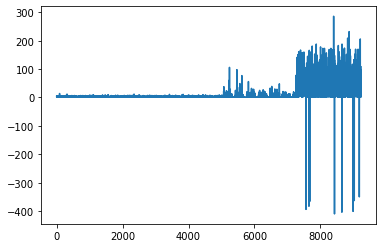

In [80]:
env_monitor = load_results(log_dir)
rewards = env_monitor['r']
plt.plot(rewards)

### Test reward

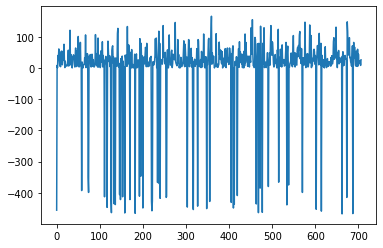

In [25]:
plt.plot(all_episode_rewards)

#### Make result dataframe

In [26]:
# data_sv_test -> The dataframe with the test-data
# dt_in_test -> The columns to be used as input-data
machine_max_rul = data_sv_test.groupby(['machine'])['rul'].max()

# Parse the data to be put into the dataframe

all_episode_rewards = np.array(all_episode_rewards)
all_nr_of_actions = np.array(all_nr_of_actions)

machine_nr = np.arange(1, len(machine_max_rul) + 1)
reward = all_episode_rewards
num_actions = all_nr_of_actions
max_rul = np.array(machine_max_rul)

In [61]:
# Create a dataframe with the results

d = {
    'machine': machine_nr,
    'reward': reward,
    'num_actions': num_actions,
    'max_RUL': max_rul
}

df = pd.DataFrame(data=d, index=None)

### Plot test results

- With avrg slack of 67% the machine stops at 33% of total possible runtime. It stops after only 1/3 of what the machine is able to run.

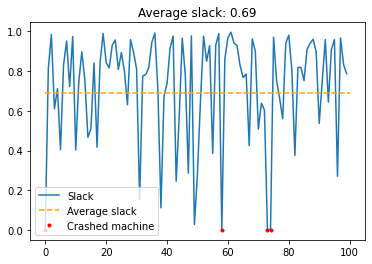

In [62]:
df["slack"] = (df["max_RUL"] - df["num_actions"])
crash_points = df[(df['max_RUL']==df["num_actions"]) & (df['reward']<0)]
average_slack = df['slack'].mean()

normalized_slack = df['slack']/df["max_RUL"]
average_slack = normalized_slack.mean()

stop = 100

plt.title(f"Average slack: {round(average_slack, 2)}")
plt.plot(normalized_slack[:stop])
plt.hlines(average_slack, 0, stop, color='orange', linestyles='dashed')
plt.plot(crash_points['slack'][crash_points['slack'].index < stop], '.', color='red')
plt.legend(['Slack', 'Average slack', 'Crashed machine'])
plt.show()

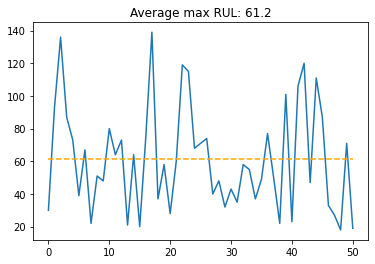

In [72]:
# Plot the max RUL for the crashing machines
max_rul_crash_points = crash_points.copy()['max_RUL'].reset_index().drop('index', axis=1)
avg_maxrul = max_rul_crash_points.mean()


plt.plot(max_rul_crash_points)
plt.hlines(avg_maxrul, 0, max_rul_crash_points.index.max(), color='orange', linestyles='dashed')
plt.title(f"Average max RUL: {round(avg_maxrul.values[0], 2)}")
plt.show()


In [82]:
# Observe the max_RUL
df.describe()

,machine,reward,num_actions,max_RUL,slack
count,707.000000,707.000000,707.000000,707.000000,707.000000
mean,354.000000,0.391796,35.449788,147.369165,111.919378
std,204.237607,122.638581,31.882463,78.471162,82.329955
min,1.000000,-468.000000,1.000000,18.000000,0.000000
25%,177.500000,8.000000,11.000000,87.500000,47.000000
50%,354.000000,21.000000,27.000000,141.000000,105.000000
75%,530.500000,44.500000,49.000000,186.000000,160.000000
max,707.000000,167.000000,167.000000,485.000000,466.000000


In [102]:
# It almost doesn't dare going above the mean. The only cases:
df[df['num_actions'] > df['max_RUL'].mean()]

,machine,reward,num_actions,max_RUL,slack
359,360,167,167,232,65
454,455,156,156,357,201
576,577,148,148,177,29
674,675,149,149,263,114


In [103]:
# Only about 1% of the times it goes above the mean max_RUL
len(df[df['num_actions'] > df['max_RUL'].mean()]) / len(df[df['max_RUL'] > df['max_RUL'].mean()])

0.012422360248447204

In [110]:
df[df['num_actions'] < (BAD_SPOT * df['max_RUL'])]

,machine,reward,num_actions,max_RUL,slack
1,2,9,9,48,39
2,3,2,2,125,123
4,5,28,28,97,69
6,7,27,27,159,132
7,8,8,8,165,157
...,...,...,...,...,...
699,700,7,7,41,34
701,702,16,16,198,182
702,703,15,15,183,168
705,706,9,9,93,84


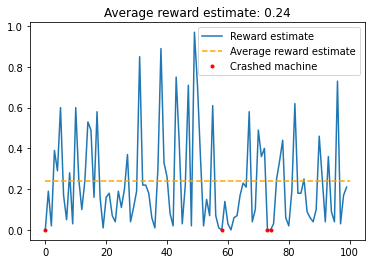

In [38]:
df['reward_estimate'] = round(df['reward'] / df['max_RUL'], 2)
df.loc[df['reward_estimate'] < 0, 'reward_estimate'] = 0
average_reward_estimate = df['reward_estimate'].mean()

plt.title(f"Average reward estimate: {round(average_reward_estimate, 2)}")
plt.plot(df['reward_estimate'][:stop])
plt.hlines(average_reward_estimate, 0, stop, color='orange', linestyles='dashed')
plt.plot(crash_points['slack'][crash_points['slack'].index < stop], '.', color='red')
plt.legend(['Reward estimate', 'Average reward estimate', 'Crashed machine'])
plt.show()


In [39]:
percent_of_crashed_machines = round(len(crash_points['slack'])/df['machine'].max(), 4)
print('percent_of_crashed_machines:', percent_of_crashed_machines)
stop_within_sweetspot = round(len(df[(df['slack']<20) & (df['reward_estimate'] > 0)])/df['machine'].max(), 4)
print('stop_within_sweetspot:', stop_within_sweetspot)


percent_of_crashed_machines: 0.0721
stop_within_sweetspot: 0.0382


# Testing new things
- Give more reward when bellow 10 from RUL

### Import and constant variables

In [113]:
import numpy as np
from matplotlib import pyplot as plt
from environment import RULEnvironment
from stable_baselines3 import DQN 
from stable_baselines3.common.monitor import Monitor, load_results
import pandas as pd
import os

import utils


In [114]:
# Create log dir
log_dir = "./pretrained_models/env2/"
os.makedirs(log_dir, exist_ok=True)

## Train model

### Load and preprocess train data

In [116]:
data_path = "./data"
data = utils.load_data(data_path)
data.head()

,src,machine,cycle,p1,p2,p3,s1,s2,s3,s4,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,rul
0,train_FD001,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,train_FD001,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,train_FD001,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,train_FD001,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,train_FD001,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [117]:
# Last column is the RUL (Label)
dt_in = list(data.columns[3:-1])
data[dt_in].describe()

,p1,p2,p3,s1,s2,s3,s4,s5,s6,s7,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,...,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000
mean,17.211973,0.410004,95.724344,485.840890,597.361022,1467.035653,1260.956434,9.894999,14.424935,359.729968,...,338.789821,2349.645243,8088.950972,9.054747,0.025185,360.698801,2273.754039,98.389146,25.942709,15.565700
std,16.527988,0.367938,12.359044,30.420388,42.478516,118.175261,136.300073,4.265554,6.443922,174.133835,...,164.193480,111.167242,80.623257,0.751581,0.004997,31.021430,142.513114,4.656270,11.691422,7.015067
min,-0.008700,-0.000600,60.000000,445.000000,535.480000,1242.670000,1023.770000,3.910000,5.670000,136.170000,...,128.310000,2027.570000,7845.780000,8.156300,0.020000,302.000000,1915.000000,84.930000,10.160000,6.010500
25%,0.001300,0.000200,100.000000,449.440000,549.960000,1357.360000,1126.830000,5.480000,8.000000,175.710000,...,164.790000,2387.970000,8070.530000,8.439250,0.020000,332.000000,2212.000000,100.000000,14.330000,8.601300
50%,19.998100,0.620000,100.000000,489.050000,605.930000,1492.810000,1271.740000,9.350000,13.660000,341.690000,...,321.690000,2388.070000,8118.590000,9.030100,0.030000,367.000000,2319.000000,100.000000,24.920000,14.953500
75%,35.001500,0.840000,100.000000,518.670000,642.340000,1586.590000,1402.200000,14.620000,21.610000,553.290000,...,521.340000,2388.160000,8139.410000,9.344200,0.030000,392.000000,2388.000000,100.000000,38.820000,23.294600
max,42.008000,0.842000,100.000000,518.670000,645.110000,1616.910000,1441.490000,14.620000,21.610000,570.810000,...,537.490000,2390.490000,8293.720000,11.066900,0.030000,400.000000,2388.000000,100.000000,39.890000,23.950500


In [118]:
# Check for null-values
data[dt_in].isnull().any().any()

# No null values

False

In [119]:
# Standardize all the daa-columns
data_sv = data.copy()
data_sv[dt_in] = (data_sv[dt_in] - data_sv[dt_in].mean()) / data_sv[dt_in].std()
data_sv.head()

,src,machine,cycle,p1,p2,p3,s1,s2,s3,s4,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,rul
0,train_FD001,1,1,-1.041426,-1.115415,0.345954,1.079181,1.046623,1.037987,1.024530,...,0.345198,0.616063,-0.845214,0.963586,1.009019,0.801652,0.345954,1.121959,1.119490,191
1,train_FD001,1,2,-1.041268,-1.115143,0.345954,1.079181,1.054391,1.055926,1.043166,...,0.345648,0.527627,-0.828849,0.963586,1.009019,0.801652,0.345954,1.116827,1.120146,190
2,train_FD001,1,3,-1.041644,-1.113512,0.345954,1.079181,1.059100,1.023517,1.050943,...,0.345288,0.549209,-0.847476,0.963586,0.944547,0.801652,0.345954,1.112550,1.108828,189
3,train_FD001,1,4,-1.041341,-1.114327,0.345954,1.079181,1.059100,0.979514,1.033848,...,0.345738,0.556651,-0.913470,0.963586,1.009019,0.801652,0.345954,1.106563,1.113061,188
4,train_FD001,1,5,-1.041498,-1.114871,0.345954,1.079181,1.059570,0.980022,1.065763,...,0.345378,0.556279,-0.832042,0.963586,1.041254,0.801652,0.345954,1.108273,1.117409,187


In [120]:
data_sv_dict = utils.split_by_field(data_sv, field='src')
print('{{{}}}'.format(', '.join(f'{k}: ...' for k in data_sv_dict.keys())))

{train_FD001: ..., train_FD002: ..., train_FD003: ..., train_FD004: ...}


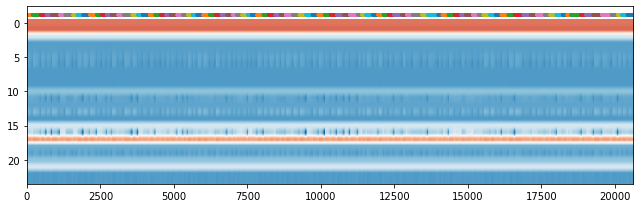

In [121]:
tmp = data_sv_dict['train_FD001']
utils.plot_dataframe(tmp[dt_in], labels=tmp['machine'])

### Set up environment

In [122]:
env = RULEnvironment(data_sv, dt_in)

/usr/local/lib/python3.9/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [123]:
states = env.observation_space.shape
actions = env.action_space.n
states

(24,)

In [124]:
# check_env(env)

#### Make monitor for the environment

In [13]:
env_monitor = Monitor(env, log_dir)

### Make model

In [14]:
# Learning starts is the same as warmup in keras-rl2

# If you want to plot with tensorboard un comment next line: 
# model = DQN("MlpPolicy", env, verbose = 1, learning_starts=10000, tensorboard_log="./tensorboard/")

# If not use this:
model = DQN("MlpPolicy", env_monitor, verbose = 1, learning_starts=10000)

Using cpu device
Wrapping the env in a DummyVecEnv.


### Train model

In [15]:
model.learn(total_timesteps=100000)

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.25     |
|    ep_rew_mean      | 1.25     |
|    exploration_rate | 1        |
| time/               |          |
|    episodes         | 4        |
|    fps              | 244      |
|    time_elapsed     | 0        |
|    total_timesteps  | 5        |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.62     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.999    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 263      |
|    time_elapsed     | 0        |
|    total_timesteps  | 13       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.58     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.998    |
| time/               |          |
|    episodes       

### Save model

In [28]:
path = f'{log_dir}model'
utils.save_model(model, path)

## Test model

### Set up test environment

In [125]:
data_path = "./data"
data_test = utils.load_data(data_path, test=True)
dt_in_test = list(data_test.columns[3:-1])
data_test.describe()

# 707 machines
# Max amount of cycles: 486

,machine,cycle,p1,p2,p3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,rul
count,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,...,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000
mean,372.662478,95.406589,17.243810,0.410887,95.748591,485.791314,597.153354,1464.738375,1257.240382,9.887805,...,2349.811235,8084.687648,9.046593,0.025039,360.088096,2273.841797,98.398282,25.949868,15.570426,94.406589
std,201.744654,74.311486,16.530141,0.368078,12.328151,30.426804,42.430629,117.856835,135.728855,4.265536,...,110.890533,78.956087,0.748390,0.005000,30.932463,142.218102,4.644631,11.701010,7.020590,74.311486
min,1.000000,1.000000,-0.008700,-0.000600,60.000000,445.000000,535.410000,1240.940000,1024.900000,3.910000,...,2027.740000,7849.800000,8.198000,0.020000,302.000000,1915.000000,84.930000,10.180000,6.123100,0.000000
25%,197.000000,38.000000,0.001300,0.000200,100.000000,449.440000,549.780000,1355.140000,1124.030000,5.480000,...,2387.950000,8068.360000,8.425600,0.020000,331.000000,2212.000000,100.000000,14.340000,8.607300,37.000000
50%,390.000000,80.000000,19.998200,0.620000,100.000000,489.050000,605.530000,1490.160000,1262.850000,9.350000,...,2388.050000,8113.100000,9.108500,0.030000,367.000000,2319.000000,100.000000,24.780000,14.872400,79.000000
75%,544.000000,135.000000,35.001500,0.840000,100.000000,518.670000,642.200000,1584.810000,1399.460000,14.620000,...,2388.110000,8136.630000,9.333900,0.030000,392.000000,2388.000000,100.000000,38.880000,23.331000,134.000000
max,707.000000,486.000000,42.008000,0.842000,100.000000,518.670000,644.320000,1609.690000,1434.120000,14.620000,...,2389.960000,8243.100000,11.030000,0.030000,398.000000,2388.000000,100.000000,39.750000,23.849600,485.000000


In [126]:
# Check for null-values
data_test[dt_in_test].isnull().any().any()

# No null values

False

In [127]:
# Standardize all the data-columns
data_sv_test = data_test.copy()
data_sv_test[dt_in_test] = (data_sv_test[dt_in_test] - data_sv_test[dt_in_test].mean()) / data_sv_test[dt_in_test].std()
data_sv_test.describe()

,machine,cycle,p1,p2,p3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,rul
count,104897.000000,104897.000000,1.048970e+05,1.048970e+05,1.048970e+05,1.048970e+05,1.048970e+05,1.048970e+05,1.048970e+05,1.048970e+05,...,1.048970e+05,1.048970e+05,1.048970e+05,1.048970e+05,1.048970e+05,1.048970e+05,1.048970e+05,1.048970e+05,1.048970e+05,104897.000000
mean,372.662478,95.406589,8.670360e-18,1.300554e-16,2.460215e-16,-1.929155e-15,-5.505678e-16,-1.140152e-15,-1.586676e-15,-2.731163e-16,...,2.991274e-15,-7.495526e-15,9.190581e-16,-1.764418e-15,-7.066343e-16,1.486967e-15,4.324342e-16,-3.121329e-16,6.762880e-16,94.406589
std,201.744654,74.311486,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,74.311486
min,1.000000,1.000000,-1.043700e+00,-1.117934e+00,-2.899753e+00,-1.340638e+00,-1.455160e+00,-1.898900e+00,-1.711798e+00,-1.401419e+00,...,-2.904407e+00,-2.974915e+00,-1.133891e+00,-1.007737e+00,-1.877901e+00,-2.523179e+00,-2.899753e+00,-1.347736e+00,-1.345660e+00,0.000000
25%,197.000000,38.000000,-1.043095e+00,-1.115760e+00,3.448537e-01,-1.194714e+00,-1.116490e+00,-9.299280e-01,-9.814448e-01,-1.033353e+00,...,3.439317e-01,-2.067940e-01,-8.297717e-01,-1.007737e+00,-9.403744e-01,-4.348377e-01,3.448537e-01,-9.922108e-01,-9.918149e-01,37.000000
50%,390.000000,80.000000,1.666284e-01,5.681230e-01,3.448537e-01,1.070992e-01,1.974198e-01,2.156992e-01,4.132959e-02,-1.260814e-01,...,3.448334e-01,3.598500e-01,8.272022e-02,9.923125e-01,2.234515e-01,3.175278e-01,3.448537e-01,-9.998010e-02,-9.942553e-02,79.000000
75%,544.000000,135.000000,1.074261e+00,1.165823e+00,3.448537e-01,1.080583e+00,1.061654e+00,1.018792e+00,1.047822e+00,1.109402e+00,...,3.453745e-01,6.578638e-01,3.839000e-01,9.923125e-01,1.031664e+00,8.026981e-01,3.448537e-01,1.105044e+00,1.105402e+00,134.000000
max,707.000000,486.000000,1.498123e+00,1.171256e+00,3.448537e-01,1.080583e+00,1.111618e+00,1.229896e+00,1.303184e+00,1.109402e+00,...,3.620576e-01,2.006335e+00,2.650231e+00,9.923125e-01,1.225635e+00,8.026981e-01,3.448537e-01,1.179397e+00,1.179270e+00,485.000000


In [128]:
env_test = RULEnvironment(data_sv_test, dt_in_test)

/usr/local/lib/python3.9/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [129]:
nb_episodes = data_sv_test['machine'].max()
nb_episodes

707

### Load trained model

In [130]:
del model

In [131]:
# If the model is supposed to be trained on, env need to be set. 
# If it's only going to be used for prediction, it can be None
model_env2 = utils.load_model(f'{log_dir}/model.zip', env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


### Evaluate model on testset

In [133]:
# Evaluate for all 707 episodes
mean_episode_reward, all_episode_rewards, all_nr_of_actions = utils.evaluate(model_env2, env_test, nb_episodes)

Mean reward: -3.062234794908062 Num episodes: 707


### Evaluate results

#### Train reward

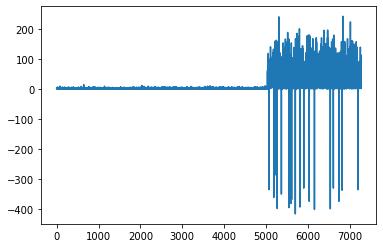

In [134]:
env2_monitor = load_results(log_dir)
rewards = env2_monitor['r']
plt.plot(rewards)

### Test reward

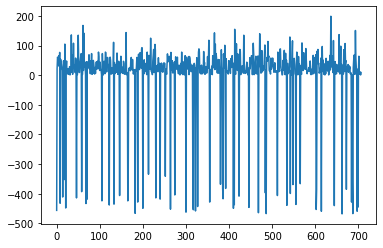

In [135]:
plt.plot(all_episode_rewards)

#### Make result dataframe

In [136]:
# data_sv_test -> The dataframe with the test-data
# dt_in_test -> The columns to be used as input-data
machine_max_rul = data_sv_test.groupby(['machine'])['rul'].max()

# Parse the data to be put into the dataframe

all_episode_rewards = np.array(all_episode_rewards)
all_nr_of_actions = np.array(all_nr_of_actions)

machine_nr = np.arange(1, len(machine_max_rul) + 1)
reward = all_episode_rewards
num_actions = all_nr_of_actions
max_rul = np.array(machine_max_rul)

In [137]:
# Create a dataframe with the results

d = {
    'machine': machine_nr,
    'reward': reward,
    'num_actions': num_actions,
    'max_RUL': max_rul
}

df_env2 = pd.DataFrame(data=d, index=None)

## Plot test results

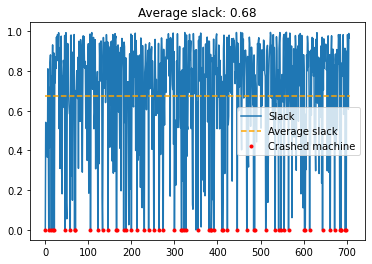

In [172]:
df_env2["slack"] = (df_env2["max_RUL"] - df_env2["num_actions"])
points_env2 = df_env2[(df_env2['max_RUL']==df_env2["num_actions"]) & (df_env2['reward']<0)]['slack']
average_slack = df_env2['slack'].mean()
normalized_slack = df_env2['slack']/df_env2["max_RUL"]
average_slack = normalized_slack.mean()

stop = 707

plt.title(f"Average slack: {round(average_slack, 2)}")
plt.plot(normalized_slack[:stop])
plt.hlines(average_slack, 0, stop, color='orange', linestyles='dashed')
plt.plot(points_env2[points_env2.index < stop], '.', color='red')
plt.legend(['Slack', 'Average slack', 'Crashed machine'])
plt.show()

In [166]:
df_env2[df_env2['num_actions']>df_env2['max_RUL']]

,machine,reward,num_actions,max_RUL,slack,reward_estimate


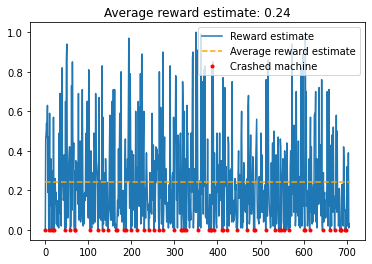

In [168]:
df_env2['reward_estimate'] = round(df_env2['reward'] / (df_env2['max_RUL']), 2)
df_env2.loc[df_env2['reward_estimate'] < 0, 'reward_estimate'] = 0
average_reward_estimate = df_env2['reward_estimate'].mean()

plt.title(f"Average reward estimate: {round(average_reward_estimate, 2)}")
plt.plot(df_env2['reward_estimate'][:stop])
plt.hlines(average_reward_estimate, 0, stop, color='orange', linestyles='dashed')
plt.plot(points_env2[points_env2.index < stop], '.', color='red')
plt.legend(['Reward estimate', 'Average reward estimate', 'Crashed machine'])
plt.show()

In [169]:
percent_of_crashed_machines = round(len(points_env2)/df_env2['machine'].max(), 4)
print('percent_of_crashed_machines:', percent_of_crashed_machines)
stop_within_sweetspot = round(len(df_env2[(df_env2['slack']<20) & (df_env2['reward_estimate'] > 0)])/df_env2['machine'].max(), 4)
print('stop_within_sweetspot:', stop_within_sweetspot)

percent_of_crashed_machines: 0.082
stop_within_sweetspot: 0.058


# Testing another new thing
- Give increasing reward within the sweetspot

### Import and constant variables

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from environment_manyextraRewards import RULEnvironment
from stable_baselines3 import DQN 
from stable_baselines3.common.monitor import Monitor, load_results
import pandas as pd
import os

import utils


In [2]:
SWEET_SPOT = 0.30
BAD_SPOT = 0.30

In [3]:
# Create log dir
log_dir = "./pretrained_models/env3/"
os.makedirs(log_dir, exist_ok=True)

## Train model

### Load and preprocess train data

In [5]:
data_path = "./data"
data = utils.load_data(data_path)
data.head()

,src,machine,cycle,p1,p2,p3,s1,s2,s3,s4,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,rul
0,train_FD001,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,train_FD001,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,train_FD001,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,train_FD001,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,train_FD001,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [6]:
# Last column is the RUL (Label)
dt_in = list(data.columns[3:-1])
data[dt_in].describe()

,p1,p2,p3,s1,s2,s3,s4,s5,s6,s7,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,...,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000
mean,17.211973,0.410004,95.724344,485.840890,597.361022,1467.035653,1260.956434,9.894999,14.424935,359.729968,...,338.789821,2349.645243,8088.950972,9.054747,0.025185,360.698801,2273.754039,98.389146,25.942709,15.565700
std,16.527988,0.367938,12.359044,30.420388,42.478516,118.175261,136.300073,4.265554,6.443922,174.133835,...,164.193480,111.167242,80.623257,0.751581,0.004997,31.021430,142.513114,4.656270,11.691422,7.015067
min,-0.008700,-0.000600,60.000000,445.000000,535.480000,1242.670000,1023.770000,3.910000,5.670000,136.170000,...,128.310000,2027.570000,7845.780000,8.156300,0.020000,302.000000,1915.000000,84.930000,10.160000,6.010500
25%,0.001300,0.000200,100.000000,449.440000,549.960000,1357.360000,1126.830000,5.480000,8.000000,175.710000,...,164.790000,2387.970000,8070.530000,8.439250,0.020000,332.000000,2212.000000,100.000000,14.330000,8.601300
50%,19.998100,0.620000,100.000000,489.050000,605.930000,1492.810000,1271.740000,9.350000,13.660000,341.690000,...,321.690000,2388.070000,8118.590000,9.030100,0.030000,367.000000,2319.000000,100.000000,24.920000,14.953500
75%,35.001500,0.840000,100.000000,518.670000,642.340000,1586.590000,1402.200000,14.620000,21.610000,553.290000,...,521.340000,2388.160000,8139.410000,9.344200,0.030000,392.000000,2388.000000,100.000000,38.820000,23.294600
max,42.008000,0.842000,100.000000,518.670000,645.110000,1616.910000,1441.490000,14.620000,21.610000,570.810000,...,537.490000,2390.490000,8293.720000,11.066900,0.030000,400.000000,2388.000000,100.000000,39.890000,23.950500


In [7]:
# Check for null-values
data[dt_in].isnull().any().any()

# No null values

False

In [8]:
# Standardize all the daa-columns
data_sv = data.copy()
data_sv[dt_in] = (data_sv[dt_in] - data_sv[dt_in].mean()) / data_sv[dt_in].std()
data_sv.head()

,src,machine,cycle,p1,p2,p3,s1,s2,s3,s4,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,rul
0,train_FD001,1,1,-1.041426,-1.115415,0.345954,1.079181,1.046623,1.037987,1.024530,...,0.345198,0.616063,-0.845214,0.963586,1.009019,0.801652,0.345954,1.121959,1.119490,191
1,train_FD001,1,2,-1.041268,-1.115143,0.345954,1.079181,1.054391,1.055926,1.043166,...,0.345648,0.527627,-0.828849,0.963586,1.009019,0.801652,0.345954,1.116827,1.120146,190
2,train_FD001,1,3,-1.041644,-1.113512,0.345954,1.079181,1.059100,1.023517,1.050943,...,0.345288,0.549209,-0.847476,0.963586,0.944547,0.801652,0.345954,1.112550,1.108828,189
3,train_FD001,1,4,-1.041341,-1.114327,0.345954,1.079181,1.059100,0.979514,1.033848,...,0.345738,0.556651,-0.913470,0.963586,1.009019,0.801652,0.345954,1.106563,1.113061,188
4,train_FD001,1,5,-1.041498,-1.114871,0.345954,1.079181,1.059570,0.980022,1.065763,...,0.345378,0.556279,-0.832042,0.963586,1.041254,0.801652,0.345954,1.108273,1.117409,187


In [9]:
data_sv_dict = utils.split_by_field(data_sv, field='src')
print('{{{}}}'.format(', '.join(f'{k}: ...' for k in data_sv_dict.keys())))

{train_FD001: ..., train_FD002: ..., train_FD003: ..., train_FD004: ...}


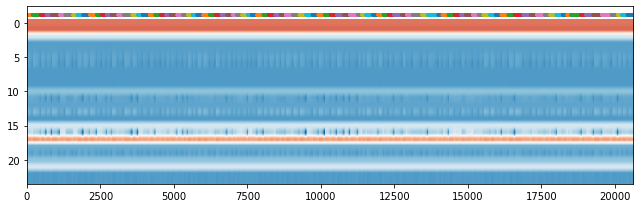

In [10]:
tmp = data_sv_dict['train_FD001']
utils.plot_dataframe(tmp[dt_in], labels=tmp['machine'])

### Set up environment

In [11]:
env = RULEnvironment(data_sv, dt_in, sweet_spot=SWEET_SPOT, bad_spot=BAD_SPOT)

/usr/local/lib/python3.9/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [12]:
states = env.observation_space.shape
actions = env.action_space.n
states

(24,)

In [13]:
# check_env(env)

#### Make monitor for the environment

In [14]:
env_monitor = Monitor(env, log_dir)

### Make model

In [15]:
# Learning starts is the same as warmup in keras-rl2

# If you want to plot with tensorboard un comment next line: 
# model = DQN("MlpPolicy", env, verbose = 1, learning_starts=10000, tensorboard_log="./tensorboard/")

# If not use this:
model = DQN("MlpPolicy", env_monitor, verbose = 1, learning_starts=10000)

Using cpu device
Wrapping the env in a DummyVecEnv.


### Train model

In [16]:
model.learn(total_timesteps=100000)

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.75     |
|    ep_rew_mean      | -199     |
|    exploration_rate | 0.999    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 205      |
|    time_elapsed     | 0        |
|    total_timesteps  | 7        |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.38     |
|    ep_rew_mean      | -200     |
|    exploration_rate | 0.999    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 223      |
|    time_elapsed     | 0        |
|    total_timesteps  | 11       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.25     |
|    ep_rew_mean      | -200     |
|    exploration_rate | 0.999    |
| time/               |          |
|    episodes       

### Save model

In [17]:
path = f'{log_dir}model'
utils.save_model(model, path)

## Test model

### Set up test environment

In [18]:
data_path = "./data"
data_test = utils.load_data(data_path, test=True)
dt_in_test = list(data_test.columns[3:-1])
data_test.describe()

# 707 machines
# Max amount of cycles: 486

,machine,cycle,p1,p2,p3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,rul
count,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,...,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000
mean,372.662478,95.406589,17.243810,0.410887,95.748591,485.791314,597.153354,1464.738375,1257.240382,9.887805,...,2349.811235,8084.687648,9.046593,0.025039,360.088096,2273.841797,98.398282,25.949868,15.570426,94.406589
std,201.744654,74.311486,16.530141,0.368078,12.328151,30.426804,42.430629,117.856835,135.728855,4.265536,...,110.890533,78.956087,0.748390,0.005000,30.932463,142.218102,4.644631,11.701010,7.020590,74.311486
min,1.000000,1.000000,-0.008700,-0.000600,60.000000,445.000000,535.410000,1240.940000,1024.900000,3.910000,...,2027.740000,7849.800000,8.198000,0.020000,302.000000,1915.000000,84.930000,10.180000,6.123100,0.000000
25%,197.000000,38.000000,0.001300,0.000200,100.000000,449.440000,549.780000,1355.140000,1124.030000,5.480000,...,2387.950000,8068.360000,8.425600,0.020000,331.000000,2212.000000,100.000000,14.340000,8.607300,37.000000
50%,390.000000,80.000000,19.998200,0.620000,100.000000,489.050000,605.530000,1490.160000,1262.850000,9.350000,...,2388.050000,8113.100000,9.108500,0.030000,367.000000,2319.000000,100.000000,24.780000,14.872400,79.000000
75%,544.000000,135.000000,35.001500,0.840000,100.000000,518.670000,642.200000,1584.810000,1399.460000,14.620000,...,2388.110000,8136.630000,9.333900,0.030000,392.000000,2388.000000,100.000000,38.880000,23.331000,134.000000
max,707.000000,486.000000,42.008000,0.842000,100.000000,518.670000,644.320000,1609.690000,1434.120000,14.620000,...,2389.960000,8243.100000,11.030000,0.030000,398.000000,2388.000000,100.000000,39.750000,23.849600,485.000000


In [19]:
# Check for null-values
data_test[dt_in_test].isnull().any().any()

# No null values

False

In [20]:
# Standardize all the data-columns
data_sv_test = data_test.copy()
data_sv_test[dt_in_test] = (data_sv_test[dt_in_test] - data_sv_test[dt_in_test].mean()) / data_sv_test[dt_in_test].std()
data_sv_test.describe()

,machine,cycle,p1,p2,p3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,rul
count,104897.000000,104897.000000,1.048970e+05,1.048970e+05,1.048970e+05,1.048970e+05,1.048970e+05,1.048970e+05,1.048970e+05,1.048970e+05,...,1.048970e+05,1.048970e+05,1.048970e+05,1.048970e+05,1.048970e+05,1.048970e+05,1.048970e+05,1.048970e+05,1.048970e+05,104897.000000
mean,372.662478,95.406589,8.670360e-18,1.300554e-16,2.460215e-16,-1.929155e-15,-5.505678e-16,-1.140152e-15,-1.586676e-15,-2.731163e-16,...,2.991274e-15,-7.495526e-15,9.190581e-16,-1.764418e-15,-7.066343e-16,1.486967e-15,4.324342e-16,-3.121329e-16,6.762880e-16,94.406589
std,201.744654,74.311486,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,74.311486
min,1.000000,1.000000,-1.043700e+00,-1.117934e+00,-2.899753e+00,-1.340638e+00,-1.455160e+00,-1.898900e+00,-1.711798e+00,-1.401419e+00,...,-2.904407e+00,-2.974915e+00,-1.133891e+00,-1.007737e+00,-1.877901e+00,-2.523179e+00,-2.899753e+00,-1.347736e+00,-1.345660e+00,0.000000
25%,197.000000,38.000000,-1.043095e+00,-1.115760e+00,3.448537e-01,-1.194714e+00,-1.116490e+00,-9.299280e-01,-9.814448e-01,-1.033353e+00,...,3.439317e-01,-2.067940e-01,-8.297717e-01,-1.007737e+00,-9.403744e-01,-4.348377e-01,3.448537e-01,-9.922108e-01,-9.918149e-01,37.000000
50%,390.000000,80.000000,1.666284e-01,5.681230e-01,3.448537e-01,1.070992e-01,1.974198e-01,2.156992e-01,4.132959e-02,-1.260814e-01,...,3.448334e-01,3.598500e-01,8.272022e-02,9.923125e-01,2.234515e-01,3.175278e-01,3.448537e-01,-9.998010e-02,-9.942553e-02,79.000000
75%,544.000000,135.000000,1.074261e+00,1.165823e+00,3.448537e-01,1.080583e+00,1.061654e+00,1.018792e+00,1.047822e+00,1.109402e+00,...,3.453745e-01,6.578638e-01,3.839000e-01,9.923125e-01,1.031664e+00,8.026981e-01,3.448537e-01,1.105044e+00,1.105402e+00,134.000000
max,707.000000,486.000000,1.498123e+00,1.171256e+00,3.448537e-01,1.080583e+00,1.111618e+00,1.229896e+00,1.303184e+00,1.109402e+00,...,3.620576e-01,2.006335e+00,2.650231e+00,9.923125e-01,1.225635e+00,8.026981e-01,3.448537e-01,1.179397e+00,1.179270e+00,485.000000


In [21]:
env_test = RULEnvironment(data_sv_test, dt_in_test)

/usr/local/lib/python3.9/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [22]:
nb_episodes = data_sv_test['machine'].max()
nb_episodes

707

### Load trained model

In [23]:
del model

In [24]:
# If the model is supposed to be trained on, env need to be set. 
# If it's only going to be used for prediction, it can be None
model_env3 = utils.load_model(f'{log_dir}/model.zip', env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [23]:
model_env3 = model

### Evaluate model on testset

In [25]:
# Evaluate for all 707 episodes
mean_episode_reward, all_episode_rewards, all_nr_of_actions = utils.evaluate(model_env3, env_test, nb_episodes)

Mean reward: -128.2220650636492 Num episodes: 707


### Evaluate results

#### Train reward

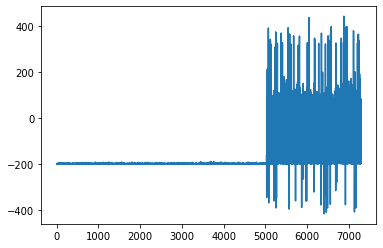

In [26]:
env2_monitor = load_results(log_dir)
rewards = env2_monitor['r']
plt.plot(rewards)

### Test reward

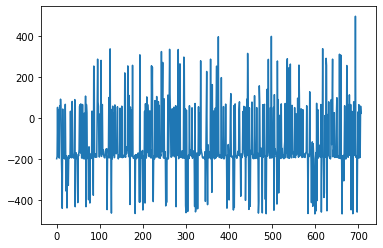

In [27]:
plt.plot(all_episode_rewards)

#### Make result dataframe

In [28]:
# data_sv_test -> The dataframe with the test-data
# dt_in_test -> The columns to be used as input-data
machine_max_rul = data_sv_test.groupby(['machine'])['rul'].max()

# Parse the data to be put into the dataframe

all_episode_rewards = np.array(all_episode_rewards)
all_nr_of_actions = np.array(all_nr_of_actions)

machine_nr = np.arange(1, len(machine_max_rul) + 1)
reward = all_episode_rewards
num_actions = all_nr_of_actions
max_rul = np.array(machine_max_rul)

In [29]:
# Create a dataframe with the results

d = {
    'machine': machine_nr,
    'reward': reward,
    'num_actions': num_actions,
    'max_RUL': max_rul
}

df_env3 = pd.DataFrame(data=d, index=None)

## Plot test results

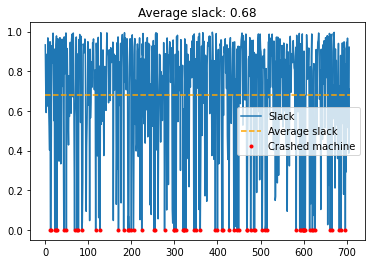

In [30]:
df_env3["slack"] = (df_env3["max_RUL"] - df_env3["num_actions"])
points_env3 = df_env3[(df_env3['max_RUL']==df_env3["num_actions"]) & (df_env3['reward']<0)]['slack']
normalized_slack = df_env3['slack']/df_env3["max_RUL"]
average_slack = normalized_slack.mean()

stop = 707

plt.title(f"Average slack: {round(average_slack, 2)}")
plt.plot(normalized_slack[:stop])
plt.hlines(average_slack, 0, stop, color='orange', linestyles='dashed')
plt.plot(points_env3[points_env3.index < stop], '.', color='red')
plt.legend(['Slack', 'Average slack', 'Crashed machine'])
plt.show()

In [31]:
df_env3[df_env3['num_actions']>df_env3['max_RUL']]

,machine,reward,num_actions,max_RUL,slack


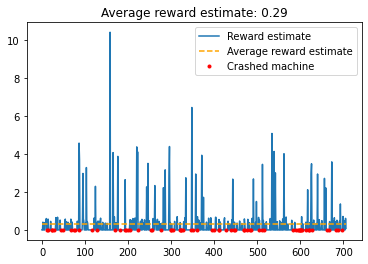

In [32]:
df_env3['reward_estimate'] = round(df_env3['reward'] / (df_env3['max_RUL']), 2)
df_env3.loc[df_env3['reward_estimate'] < 0, 'reward_estimate'] = 0
average_reward_estimate = df_env3['reward_estimate'].mean()

plt.title(f"Average reward estimate: {round(average_reward_estimate, 2)}")
plt.plot(df_env3['reward_estimate'][:stop])
plt.hlines(average_reward_estimate, 0, stop, color='orange', linestyles='dashed')
plt.plot(points_env3[points_env3.index < stop], '.', color='red')
plt.legend(['Reward estimate', 'Average reward estimate', 'Crashed machine'])
plt.show()

In [33]:
percent_of_crashed_machines = round(len(points_env3)/df_env3['machine'].max(), 4)
print('percent_of_crashed_machines:', percent_of_crashed_machines)
stop_within_sweetspot = round(len(df_env3[(df_env3['slack']<20) & (df_env3['reward_estimate'] > 0)])/df_env3['machine'].max(), 4)
print('stop_within_sweetspot:', stop_within_sweetspot)

percent_of_crashed_machines: 0.0934
stop_within_sweetspot: 0.0552
